## Imputation Analysis by scSTORM
To run the code, you need to install Tangram by `pip install tangram-sc` besides the MultiGPS requirements.


In [4]:
import scanpy as sc
import numpy as np
import tangram as tg
from scipy import stats
import random

adata_st and adata_sc can be downloaded from https://drive.google.com/drive/folders/1bSPfU1mtF2mJ8X3LAVgFUKMTp5ElxPCu?usp=drive_link

In [3]:
adata_st = sc.read('/root/autodl-tmp/MultiGPS/notebook/MERFISH/Zhuang-ABCA-1.014_processed.h5ad')
adata_sc = sc.read('/root/autodl-tmp/MultiGPS/notebook/imputation/WMB-10Xv3-OLF-raw.h5ad')
gene_st = adata_st.var_names.values
gene_sc = adata_sc.var_names.values
intresected_markers = list(set(gene_sc).intersection(set(gene_st)))

remains_markers = intresected_markers[100:]
print(f"remains_markers:{remains_markers}")
preserved_markers = intresected_markers[:100]
print(f"preserved_markers:{preserved_markers}")

#save preserved markers and remains markers
with open('/root/autodl-tmp/MultiGPS/notebook/imputation/preserved_markers.txt', 'w') as f:
    print(preserved_markers, file=f)
with open('/root/autodl-tmp/MultiGPS/notebook/imputation/remains_markers.txt', 'w') as f:
    print(remains_markers, file=f)
    
preserved_markers_lower = [x.lower() for x in preserved_markers]

adata_st_remains = adata_st[:,remains_markers]
adata_st_remains.write_h5ad('/root/autodl-tmp/MultiGPS/notebook/imputation/Zhuang-ABCA-1.014_processed_preserved.h5ad')
print(adata_st_remains)

remains_markers:['ENSMUSG00000046546', 'ENSMUSG00000031075', 'ENSMUSG00000042761', 'ENSMUSG00000027568', 'ENSMUSG00000028753', 'ENSMUSG00000079466', 'ENSMUSG00000024697', 'ENSMUSG00000020178', 'ENSMUSG00000087461', 'ENSMUSG00000012819', 'ENSMUSG00000028341', 'ENSMUSG00000038370', 'ENSMUSG00000030905', 'ENSMUSG00000031344', 'ENSMUSG00000048387', 'ENSMUSG00000000690', 'ENSMUSG00000023886', 'ENSMUSG00000059049', 'ENSMUSG00000052942', 'ENSMUSG00000026604', 'ENSMUSG00000069793', 'ENSMUSG00000035506', 'ENSMUSG00000025789', 'ENSMUSG00000034384', 'ENSMUSG00000025905', 'ENSMUSG00000071984', 'ENSMUSG00000025780', 'ENSMUSG00000090255', 'ENSMUSG00000020052', 'ENSMUSG00000019828', 'ENSMUSG00000029591', 'ENSMUSG00000045312', 'ENSMUSG00000085139', 'ENSMUSG00000032511', 'ENSMUSG00000025400', 'ENSMUSG00000042115', 'ENSMUSG00000029219', 'ENSMUSG00000022514', 'ENSMUSG00000037393', 'ENSMUSG00000017493', 'ENSMUSG00000022122', 'ENSMUSG00000091636', 'ENSMUSG00000015134', 'ENSMUSG00000051910', 'ENSMUSG0000004

In [2]:
!python /root/autodl-tmp/MultiGPS/main.py \
--adata_file "/root/autodl-tmp/MultiGPS/notebook/imputation/Zhuang-ABCA-1.014_processed_preserved.h5ad" \
--task_name "imputation_MultiGPS" \
--seed 1 \
--tasks "recon,cls,coordination" \
--saving_dir "/root/autodl-tmp/MultiGPS/test/imputation_1014/index/" \
--log_dir "/root/autodl-tmp/MultiGPS/test/imputation_1014/log/" \
--device cuda:0 \
--epoch 1000 \
--layer log1pcpm \
--val \
--record 100 \
--activation tanh \
--batch_size 1024 \
--learning_rate 0.001

MultiGPS start!
  0%|                                                  | 0/1000 [00:00<?, ?it/s]Epoch 0 Started
Task recon Loss in train: 1.002105474472046
Task recon Loss in val: 0.9921647906303406
Task cls Loss in train: 3.499037742614746
Task cls Loss in val: 2.9822757244110107
Task coo Loss in train: 11.277559280395508
Task coo Loss in val: 5.524987697601318
  0%|                                          | 1/1000 [00:00<09:13,  1.81it/s]Epoch 1 Started
Task recon Loss in train: 0.9796928763389587
Task recon Loss in val: 0.9514315128326416
Task cls Loss in train: 2.5602009296417236
Task cls Loss in val: 2.2476370334625244
Task coo Loss in train: 1.8265279531478882
Task coo Loss in val: 0.42179930210113525
  0%|                                          | 2/1000 [00:00<06:24,  2.60it/s]Epoch 2 Started
Task recon Loss in train: 0.9508943557739258
Task recon Loss in val: 0.9365343451499939
Task cls Loss in train: 2.0782599449157715
Task cls Loss in val: 1.7759119272232056
Task coo Loss 

In [2]:
adata_st = sc.read('/root/autodl-tmp/MultiGPS/notebook/MERFISH/Zhuang-ABCA-1.014_processed.h5ad')
adata_sc = sc.read('/root/autodl-tmp/MultiGPS/notebook/imputation/WMB-10Xv3-OLF-raw.h5ad')
sc.pp.subsample(adata_sc, n_obs = 25000)

with open(f'/root/autodl-tmp/MultiGPS/test/imputation_1014/index/recon-cls-coordination-seed1-imputation_MultiGPS-epoch:999.txt', "r") as f:
    gene_panel = f.readline()
    gene_panel = eval(gene_panel)
    gene_panel = [x.upper() for x in gene_panel]
    
gene_idx = []
for x in gene_panel:
    try:
        gene_idx.append(adata_st.var.index.index(x))
    except:
        pass
gene_panel = gene_panel[:32]

gene_st = adata_st.var_names.values
gene_sc = adata_sc.var_names.values

tg.pp_adatas(adata_sc, adata_st, genes=gene_panel)
print("TG start!")
ad_map = tg.map_cells_to_space(adata_sc, adata_st,
    mode="cells",
    # density_prior='rna_count_based',
    num_epochs = 1000,
    device="cuda:0",
    # device='cpu',ss
)
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=adata_sc)
ad_ge.var.index = [x.upper() for x in ad_ge.var.index]
ad_ge.write_h5ad('/root/autodl-tmp/MultiGPS/notebook/imputation/imputated-by-selected-genes-1014.h5ad')
print(ad_ge)

INFO:root:32 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:1112 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
INFO:root:Allocate tensors for mapping.


TG start!


INFO:root:Begin training with 32 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.362, KL reg: 0.146
Score: 0.960, KL reg: 0.003
Score: 0.974, KL reg: 0.001
Score: 0.977, KL reg: 0.000
Score: 0.978, KL reg: 0.000
Score: 0.978, KL reg: 0.000
Score: 0.979, KL reg: 0.000
Score: 0.979, KL reg: 0.000
Score: 0.979, KL reg: 0.000
Score: 0.979, KL reg: 0.000


INFO:root:Saving results..


AnnData object with n_obs × n_vars = 11088 × 28043
    obs: 'brain_section_label_x', 'brain_section_label_y', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x_x', 'y_x', 'z_x', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'x_y', 'y_y', 'z_y', 'parcellation_index', 'tissue', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'cell_type', 'uniform_density', 'rna_count_based_density'
    var: 'gene_symbol', 'n_cells', 'sparsity', 'is_training'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows', 'training_genes', 'overlap_genes'


Mean Correlation:0.20308492189066973
Max Correlation:0.7638474628052481
Min Correlation:-0.0039165545716954775


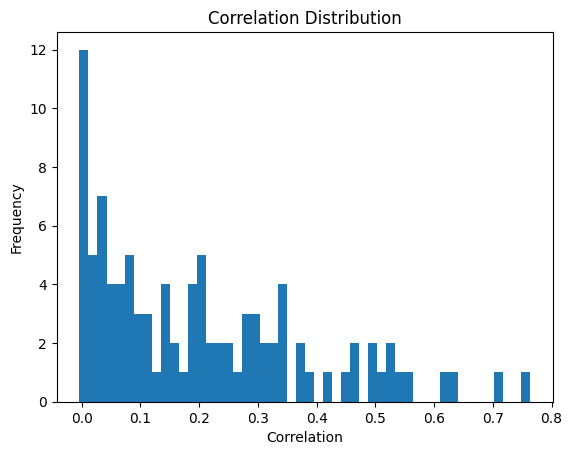

In [6]:
adata_st = sc.read('/root/autodl-tmp/MultiGPS/notebook/MERFISH/Zhuang-ABCA-1.014_processed.h5ad')
adata_impute = sc.read('/root/autodl-tmp/MultiGPS/notebook/imputation/imputated-by-selected-genes-1014.h5ad')

with open('/root/autodl-tmp/MultiGPS/notebook/imputation/preserved_markers.txt', 'r') as f:
    preserved_markers = f.readline()
    preserved_markers = eval(preserved_markers)
    
# Occasionally, the imputed data may not contain all preserved markers, so we need to filter out the preserved markers that are not in the imputed data
preserved_markers = np.intersect1d(preserved_markers, adata_impute.var.index)

preserved_groundtruth = adata_st[:,preserved_markers].X
preserved_imputed = adata_impute[:,preserved_markers].X

correlations = []
for i in range(len(preserved_markers)):
    correlation = stats.pearsonr(preserved_groundtruth[:,i], preserved_imputed[:,i])[0]
    correlations.append(correlation)
    
print(f"Mean Correlation:{np.mean(correlations)}")
print(f"Max Correlation:{np.max(correlations)}")
print(f"Min Correlation:{np.min(correlations)}")

# plot the correlation distribution
import matplotlib.pyplot as plt
plt.hist(correlations, bins=50)
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Correlation Distribution')
plt.show()

## Random baseline
Tangram by random genes

In [9]:
adata_st = sc.read('/root/autodl-tmp/MultiGPS/notebook/MERFISH/Zhuang-ABCA-1.014_processed.h5ad')
adata_sc = sc.read('/root/autodl-tmp/MultiGPS/notebook/imputation/WMB-10Xv3-OLF-raw.h5ad')
adata_st_remains = sc.read('/root/autodl-tmp/MultiGPS/notebook/imputation/Zhuang-ABCA-1.014_processed_preserved.h5ad')
sc.pp.subsample(adata_sc, n_obs = 25000)

gene_panel = random.sample(list(adata_st_remains.var.index), 32)

gene_st = adata_st.var_names.values
gene_sc = adata_sc.var_names.values

tg.pp_adatas(adata_sc, adata_st, genes=gene_panel)
print("TG start!")
ad_map = tg.map_cells_to_space(adata_sc, adata_st,
    mode="cells",
    # density_prior='rna_count_based',
    num_epochs = 1000,
    device="cuda:0",
    # device='cpu',ss
)
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=adata_sc)
ad_ge.var.index = [x.upper() for x in ad_ge.var.index]
print(ad_ge)

INFO:root:31 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:1112 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
INFO:root:Allocate tensors for mapping.


TG start!


INFO:root:Begin training with 31 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.227, KL reg: 0.146
Score: 0.975, KL reg: 0.004
Score: 0.985, KL reg: 0.001
Score: 0.987, KL reg: 0.001
Score: 0.988, KL reg: 0.001
Score: 0.988, KL reg: 0.001
Score: 0.988, KL reg: 0.001
Score: 0.989, KL reg: 0.000
Score: 0.989, KL reg: 0.000
Score: 0.989, KL reg: 0.000


INFO:root:Saving results..


AnnData object with n_obs × n_vars = 11088 × 28043
    obs: 'brain_section_label_x', 'brain_section_label_y', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x_x', 'y_x', 'z_x', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'x_y', 'y_y', 'z_y', 'parcellation_index', 'tissue', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'cell_type', 'uniform_density', 'rna_count_based_density'
    var: 'gene_symbol', 'n_cells', 'sparsity', 'is_training'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows', 'training_genes', 'overlap_genes'


Mean Correlation (Random):0.13540956581049668
Max Correlation (Random):0.5506039319658647
Min Correlation (Random):-0.005838401075396699


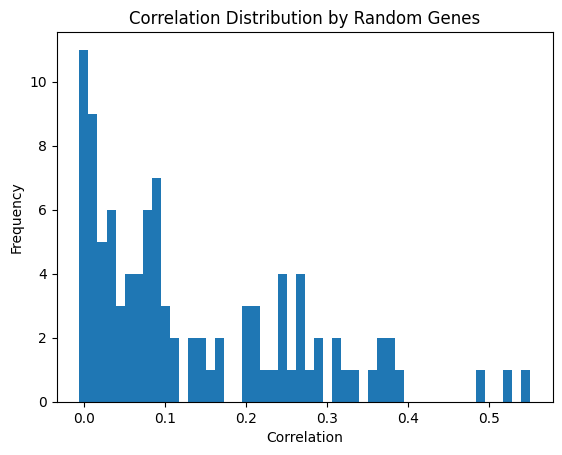

In [10]:
adata_st = sc.read('/root/autodl-tmp/MultiGPS/notebook/MERFISH/Zhuang-ABCA-1.014_processed.h5ad')
adata_impute = ad_ge

with open('/root/autodl-tmp/MultiGPS/notebook/imputation/preserved_markers.txt', 'r') as f:
    preserved_markers = f.readline()
    preserved_markers = eval(preserved_markers)
    
# Occasionally, the imputed data may not contain all preserved markers, so we need to filter out the preserved markers that are not in the imputed data
preserved_markers = np.intersect1d(preserved_markers, adata_impute.var.index)

preserved_groundtruth = adata_st[:,preserved_markers].X
preserved_imputed = adata_impute[:,preserved_markers].X

correlations = []
for i in range(len(preserved_markers)):
    correlation = stats.pearsonr(preserved_groundtruth[:,i], preserved_imputed[:,i])[0]
    correlations.append(correlation)
    
print(f"Mean Correlation (Random):{np.mean(correlations)}")
print(f"Max Correlation (Random):{np.max(correlations)}")
print(f"Min Correlation (Random):{np.min(correlations)}")

# plot the correlation distribution
import matplotlib.pyplot as plt
plt.hist(correlations, bins=50)
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Correlation Distribution by Random Genes')
plt.show()